#### Lesson: LQ Control: Foundations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import LQ

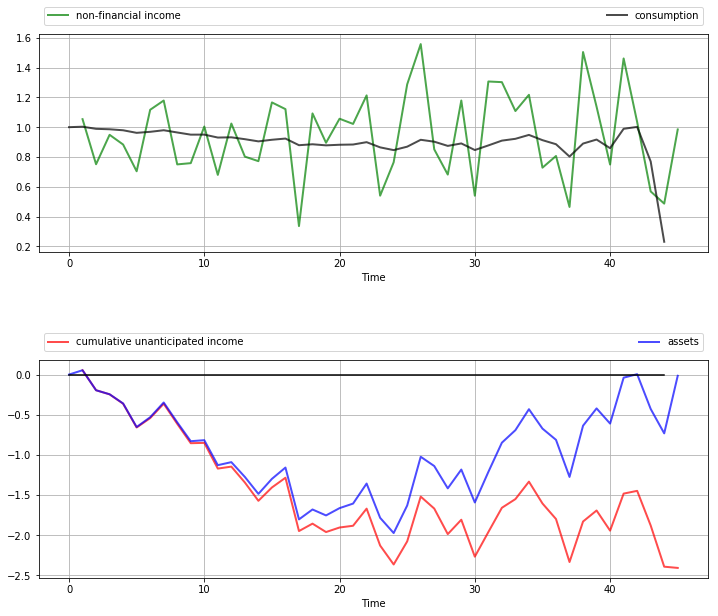

In [3]:
# Model parameters
r = 0.05
β = 1/(1 + r)
T = 45
c_bar = 2
σ = 0.25
μ = 1
q = 1e6

# Formulate as an LQ problem
Q = 1
R = np.zeros((2, 2))
Rf = np.zeros((2, 2))
Rf[0, 0] = q
A = [[1 + r, -c_bar + μ],
    [0,              1]]
B = [[-1],
    [ 0]]
C = [[σ],
    [0]]

# Compute solutions and simulate
lq = LQ(Q, R, A, B, C, beta=β, T=T, Rf=Rf)
x0 = (0, 1)
xp, up, wp = lq.compute_sequence(x0)

# Convert back to assets, consumption and income
assets = xp[0, :]           # a_t
c = up.flatten() + c_bar    # c_t
income = σ * wp[0, 1:] + μ  # y_t

# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(list(range(1, T+1)), income, 'g-', label="non-financial income",
            **p_args)
axes[0].plot(list(range(T)), c, 'k-', label="consumption", **p_args)

axes[1].plot(list(range(1, T+1)), np.cumsum(income - μ), 'r-',
            label="cumulative unanticipated income", **p_args)
axes[1].plot(list(range(T+1)), assets, 'b-', label="assets", **p_args)
axes[1].plot(list(range(T)), np.zeros(T), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

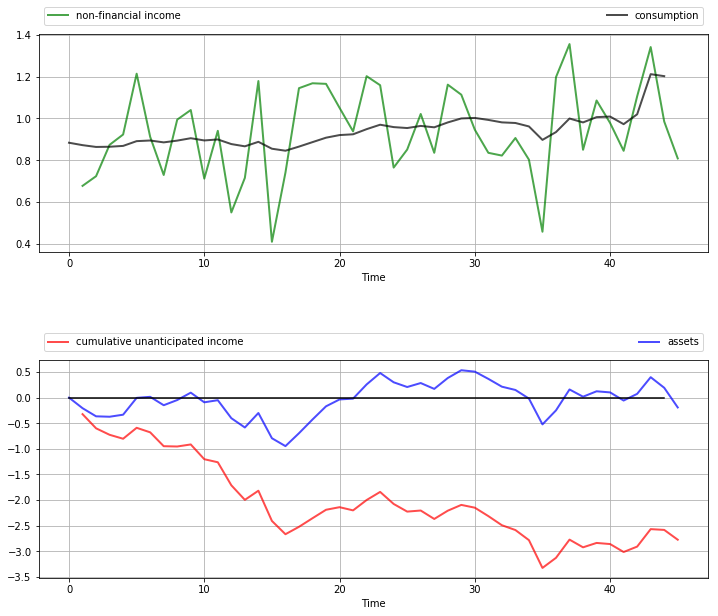

In [4]:
# Compute solutions and simulate
lq = LQ(Q, R, A, B, C, beta=0.96, T=T, Rf=Rf)
x0 = (0, 1)
xp, up, wp = lq.compute_sequence(x0)

# Convert back to assets, consumption and income
assets = xp[0, :]           # a_t
c = up.flatten() + c_bar    # c_t
income = σ * wp[0, 1:] + μ  # y_t

# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(list(range(1, T+1)), income, 'g-', label="non-financial income",
             **p_args)
axes[0].plot(list(range(T)), c, 'k-', label="consumption", **p_args)

axes[1].plot(list(range(1, T+1)), np.cumsum(income - μ), 'r-',
             label="cumulative unanticipated income", **p_args)
axes[1].plot(list(range(T+1)), assets, 'b-', label="assets", **p_args)
axes[1].plot(list(range(T)), np.zeros(T), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

Exercise 1

![Ex1](img/lqcontrol_1.png)

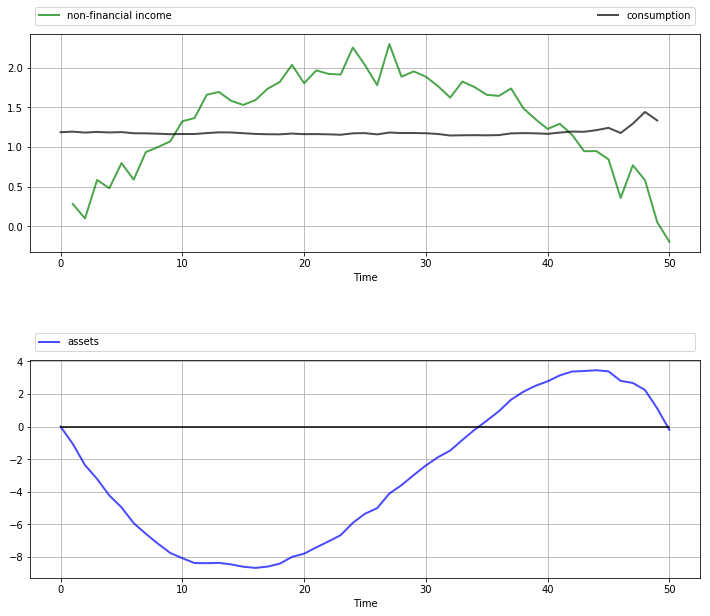

In [5]:
# Model parameters
r = 0.05
β = 1/(1 + r)
T = 50
c_bar = 1.5
σ = 0.15
μ = 2
q = 1e4
m1 = T * (μ/(T/2)**2)
m2 = -(μ/(T/2)**2)

# Formulate as an LQ problem
Q = 1
R = np.zeros((4, 4))
Rf = np.zeros((4, 4))
Rf[0, 0] = q
A = [[1 + r, -c_bar, m1, m2],
     [0,          1,  0,  0],
     [0,          1,  1,  0],
     [0,          1,  2,  1]]
B = [[-1],
     [ 0],
     [ 0],
     [ 0]]
C = [[σ],
     [0],
     [0],
     [0]]

# Compute solutions and simulate
lq = LQ(Q, R, A, B, C, beta=β, T=T, Rf=Rf)
x0 = (0, 1, 0, 0)
xp, up, wp = lq.compute_sequence(x0)

# Convert results back to assets, consumption and income
ap = xp[0, :]               # Assets
c = up.flatten() + c_bar    # Consumption
time = np.arange(1, T+1)
income = σ * wp[0, 1:] + m1 * time + m2 * time**2  # Income


# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(range(1, T+1), income, 'g-', label="non-financial income",
            **p_args)
axes[0].plot(range(T), c, 'k-', label="consumption", **p_args)

axes[1].plot(range(T+1), ap.flatten(), 'b-', label="assets", **p_args)
axes[1].plot(range(T+1), np.zeros(T+1), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

Exercise 2

![Ex2](img/lqcontrol_2.png)

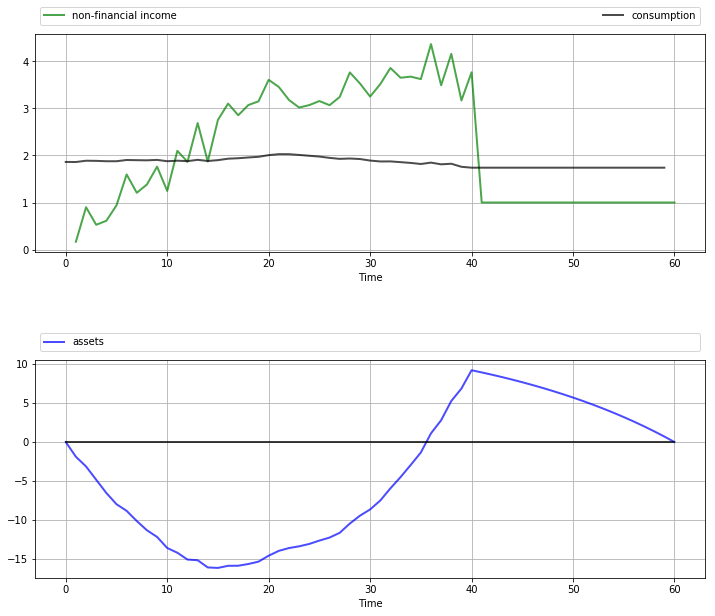

In [6]:
# Model parameters
r = 0.05
β = 1/(1 + r)
T = 60
K = 40
c_bar = 4
σ = 0.35
μ = 4
q = 1e4
s = 1
m1 = 2 * μ/K
m2 = -μ/K**2

# Formulate LQ problem 1 (retirement)
Q = 1
R = np.zeros((4, 4))
Rf = np.zeros((4, 4))
Rf[0, 0] = q
A = [[1 + r, s - c_bar, 0, 0],
     [0,             1, 0, 0],
     [0,             1, 1, 0],
     [0,             1, 2, 1]]
B = [[-1],
     [ 0],
     [ 0],
     [ 0]]
C = [[0],
     [0],
     [0],
     [0]]

# Initialize LQ instance for retired agent
lq_retired = LQ(Q, R, A, B, C, beta=β, T=T-K, Rf=Rf)
# Iterate back to start of retirement, record final value function
for i in range(T-K):
    lq_retired.update_values()
Rf2 = lq_retired.P

# Formulate LQ problem 2 (working life)
R = np.zeros((4, 4))
A = [[1 + r, -c_bar, m1, m2],
     [0,          1,  0,  0],
     [0,          1,  1,  0],
     [0,          1,  2,  1]]
B = [[-1],
     [ 0],
     [ 0],
     [ 0]]
C = [[σ],
     [0],
     [0],
     [0]]

# Set up working life LQ instance with terminal Rf from lq_retired
lq_working = LQ(Q, R, A, B, C, beta=β, T=K, Rf=Rf2)

# Simulate working state / control paths
x0 = (0, 1, 0, 0)
xp_w, up_w, wp_w = lq_working.compute_sequence(x0)
# Simulate retirement paths (note the initial condition)
xp_r, up_r, wp_r = lq_retired.compute_sequence(xp_w[:, K])

# Convert results back to assets, consumption and income
xp = np.column_stack((xp_w, xp_r[:, 1:]))
assets = xp[0, :]                  # Assets

up = np.column_stack((up_w, up_r))
c = up.flatten() + c_bar           # Consumption

time = np.arange(1, K+1)
income_w = σ * wp_w[0, 1:K+1] + m1 * time + m2 * time**2  # Income
income_r = np.ones(T-K) * s
income = np.concatenate((income_w, income_r))

# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(range(1, T+1), income, 'g-', label="non-financial income",
            **p_args)
axes[0].plot(range(T), c, 'k-', label="consumption", **p_args)

axes[1].plot(range(T+1), assets, 'b-', label="assets", **p_args)
axes[1].plot(range(T+1), np.zeros(T+1), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

Exercise 3

![Ex3](img/lqcontrol_3.png)

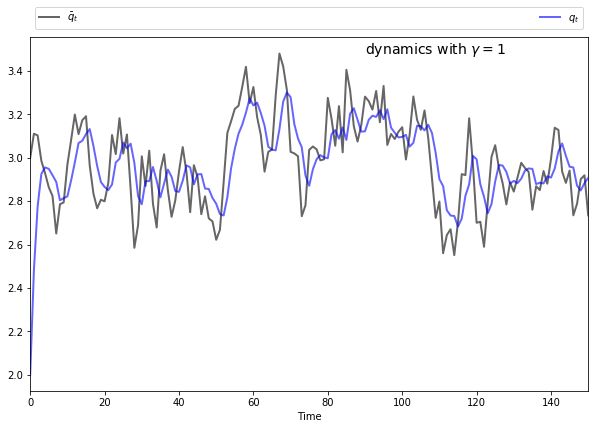

In [7]:
# Model parameters
a0 = 5
a1 = 0.5
σ = 0.15
ρ = 0.9
γ = 1
β = 0.95
c = 2
T = 120

# Useful constants
m0 = (a0-c)/(2 * a1)
m1 = 1/(2 * a1)

# Formulate LQ problem
Q = γ
R = [[ a1, -a1,  0],
     [-a1,  a1,  0],
     [  0,   0,  0]]
A = [[ρ, 0, m0 * (1 - ρ)],
     [0, 1,            0],
     [0, 0,            1]]

B = [[0],
     [1],
     [0]]
C = [[m1 * σ],
     [     0],
     [     0]]

lq = LQ(Q, R, A, B, C=C, beta=β)

# Simulate state / control paths
x0 = (m0, 2, 1)
xp, up, wp = lq.compute_sequence(x0, ts_length=150)
q_bar = xp[0, :]
q = xp[1, :]

# Plot simulation results
fig, ax = plt.subplots(figsize=(10, 6.5))

# Some fancy plotting stuff -- simplify if you prefer
bbox = (0., 1.01, 1., .101)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.6}

time = range(len(q))
ax.set(xlabel='Time', xlim=(0, max(time)))
ax.plot(time, q_bar, 'k-', lw=2, alpha=0.6, label=r'$\bar q_t$')
ax.plot(time, q, 'b-', lw=2, alpha=0.6, label='$q_t$')
ax.legend(ncol=2, **legend_args)
s = f'dynamics with $\gamma = {γ}$'
ax.text(max(time) * 0.6, 1 * q_bar.max(), s, fontsize=14)
plt.show()

#### Lesson: Optimal Savings I: The Permanent Income Model

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from numba import njit

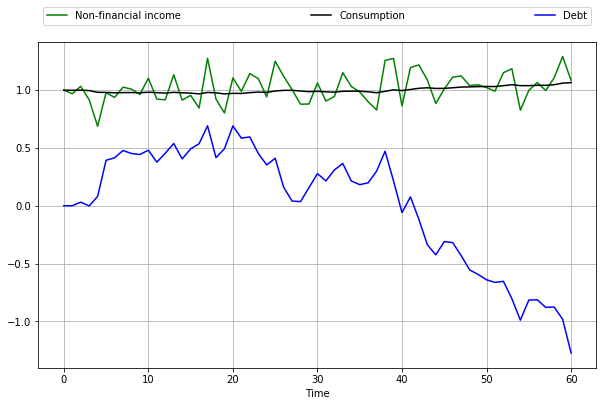

In [9]:
r = 0.05
β = 1 / (1 + r)
σ = 0.15
μ = 1
T = 60

@njit
def time_path(T):
    w = np.random.randn(T+1)  # w_0, w_1, ..., w_T
    w[0] = 0
    b = np.zeros(T+1)
    for t in range(1, T+1):
        b[t] = w[1:t].sum()
    b = -σ * b
    c = μ + (1 - β) * (σ * w - b)
    return w, b, c

w, b, c = time_path(T)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(μ + σ * w, 'g-', label="Non-financial income")
ax.plot(c, 'k-', label="Consumption")
ax.plot( b, 'b-', label="Debt")
ax.legend(ncol=3, mode='expand', bbox_to_anchor=(0., 1.02, 1., .102))
ax.grid()
ax.set_xlabel('Time')

plt.show()

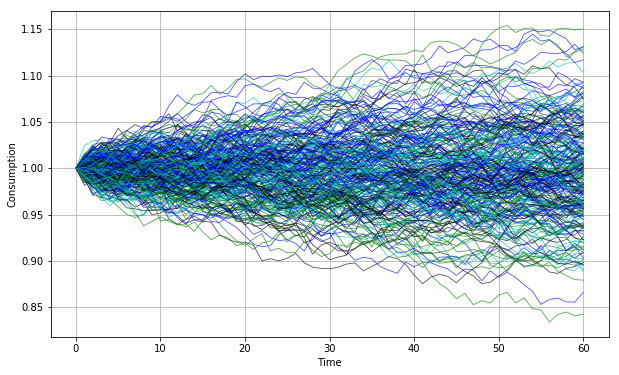

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

b_sum = np.zeros(T+1)
for i in range(250):
    w, b, c = time_path(T)  # Generate new time path
    rcolor = random.choice(('c', 'g', 'b', 'k'))
    ax.plot(c, color=rcolor, lw=0.8, alpha=0.7)

ax.grid()
ax.set(xlabel='Time', ylabel='Consumption')

plt.show()

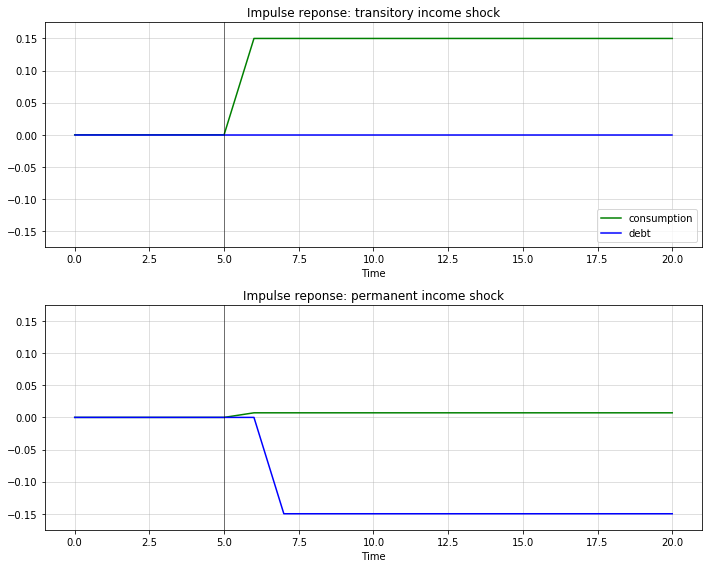

In [11]:
r = 0.05
β = 1 / (1 + r)
S = 5   # Impulse date
σ1 = σ2 = 0.15

@njit
def time_path(T, permanent=False):
    "Time path of consumption and debt given shock sequence"
    w1 = np.zeros(T+1)
    w2 = np.zeros(T+1)
    b = np.zeros(T+1)
    c = np.zeros(T+1)
    if permanent:
        w1[S+1] = 1.0
    else:
        w2[S+1] = 1.0
    for t in range(1, T):
        b[t+1] = b[t] - σ2 * w2[t]
        c[t+1] = c[t] + σ1 * w1[t+1] + (1 - β) * σ2 * w2[t+1]
    return b, c


fig, axes = plt.subplots(2, 1, figsize=(10, 8))
titles = ['transitory', 'permanent']

L = 0.175

for ax, truefalse, title in zip(axes, (True, False), titles):
    b, c = time_path(T=20, permanent=truefalse)
    ax.set_title(f'Impulse reponse: {title} income shock')
    ax.plot(c, 'g-', label="consumption")
    ax.plot(b, 'b-', label="debt")
    ax.plot((S, S), (-L, L), 'k-', lw=0.5)
    ax.grid(alpha=0.5)
    ax.set(xlabel=r'Time', ylim=(-L, L))

axes[0].legend(loc='lower right')

plt.tight_layout()
plt.show()

